In [87]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [88]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [89]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [90]:
import tensorflow as tf

In [91]:
def get_lines(filename):
    with open(filename, 'r') as f:
        return f.readlines()

In [92]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [93]:
len(train_lines)

210040

In [94]:
def process_text(filename):
  
  input_lines = get_lines(filename) 
  abstract_lines = "" 
  abstract_samples = [] 
  
  
  for line in input_lines:
    if line.startswith("###"): 
      abstract_id = line
      abstract_lines = "" 
    elif line.isspace(): 
      abstract_line_split = abstract_lines.splitlines() 

      
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} 
        target_text_split = abstract_line.split("\t") 
        line_data["target"] = target_text_split[0] 
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1 
        abstract_samples.append(line_data) 
    
    else: 
      abstract_lines += line
  
  return abstract_samples

In [95]:
%%time
train_samples = process_text(data_dir + "train.txt")
val_samples = process_text(data_dir + "dev.txt") 
test_samples = process_text(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 420 ms, sys: 119 ms, total: 538 ms
Wall time: 573 ms


(180040, 30212, 30135)

In [96]:
len(train_samples), len(test_samples), len(val_samples)

(180040, 30135, 30212)

In [97]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(val_samples)

In [98]:
train_df[:13]

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


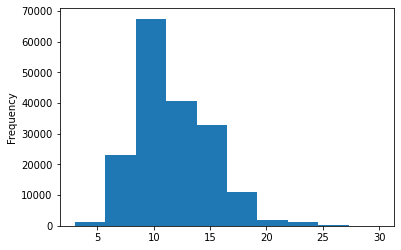

In [99]:
import matplotlib.pyplot as plt
train_df['total_lines'].plot.hist()

In [100]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
train_labels_onehot = onehot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_onehot = onehot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_onehot = onehot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

In [101]:
train_labels_onehot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [102]:
test_labels_onehot

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [103]:
val_labels_onehot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [104]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

In [105]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [106]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [107]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

## model 0 naive bayes

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf' , MultinomialNB()),
])

model0.fit(X = train_sentences,
           y = train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [109]:
model0.score(X=val_sentences,
             y = val_labels_encoded)

0.7218323844829869

In [110]:
baseline_preds = model0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [111]:
val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

In [112]:
from helper_functions import *

In [113]:
baseline_results = calculate_results(baseline_preds, val_labels_encoded)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7835634520695112,
 'recall': 0.7218323844829869,
 'f1': 0.7447397336209445}

In [114]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [115]:
sent_len = [len(sentence.split()) for sentence in train_sentences]

In [116]:
avg_sent_len = sum(sent_len)/(len(sent_len))
avg_sent_len = int(avg_sent_len)
avg_sent_len

26

(array([4.6220e+03, 2.0864e+04, 3.5052e+04, 3.6426e+04, 2.8882e+04,
        2.0006e+04, 1.2593e+04, 7.6670e+03, 4.8980e+03, 2.6580e+03,
        2.0780e+03, 1.3590e+03, 8.9500e+02, 6.0000e+02, 4.4400e+02,
        2.9300e+02, 2.0300e+02, 1.2500e+02, 1.0000e+02, 6.5000e+01,
        4.9000e+01, 3.6000e+01, 2.6000e+01, 2.3000e+01, 1.2000e+01,
        8.0000e+00, 1.1000e+01, 4.0000e+00, 5.0000e+00, 4.0000e+00,
        3.0000e+00, 3.0000e+00, 6.0000e+00, 2.0000e+00, 5.0000e+00,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,   6.9,  12.8,  18.7,  24.6,  30.5,  36.4,  42.3,  48.2,
         54.1,  60. ,  65.9,  71.8,  77.7,  83.6,  89.5,  95.4, 101.3,
        107.2, 113.1, 119. , 124.9, 130.8, 136.7, 142.6, 148.5, 154.4,
        160.3, 166.2, 172.1, 178. , 183.9, 189.8, 195.7, 201.6, 207.5,
        213.4, 219.3, 225.2, 231.1

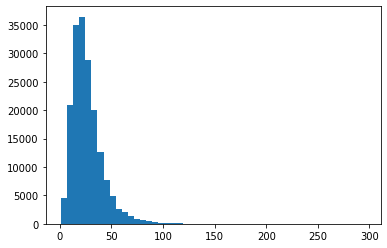

In [117]:
import matplotlib.pyplot as plt
plt.hist(sent_len,bins=50)

In [118]:
output_seq_len = int(np.percentile(sent_len, 95))
output_seq_len

55

In [119]:
max_len = max(sent_len)
max_len

296

In [120]:
max_tokens = 68000
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_tokens,
                                                    output_sequence_length=output_seq_len)

In [121]:
text_vectorizer.adapt(train_sentences)

In [122]:
text_vectorizer.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [123]:
rct_vocab = text_vectorizer.get_vocabulary()

In [124]:
embedding = tf.keras.layers.Embedding(input_dim=len(rct_vocab),
                                      output_dim=128,
                                      mask_zero=True,
                                      name='tokken_embedding')

In [125]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_onehot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_onehot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_onehot))

In [126]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [127]:
test_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [128]:
train_dataset = train_dataset.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

In [129]:

inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) 
token_embeddings = embedding(text_vectors) 
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) 
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)


model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [130]:
history1 = model_1.fit(train_dataset,
                       steps_per_epoch=int(0.1 * len(train_dataset)),
                       epochs=3,
                       validation_data=valid_dataset,
                       validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 7s 10ms/step - loss: 0.9160 - accuracy: 0.6403 - val_loss: 0.6812 - val_accuracy: 0.7367
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6547 - accuracy: 0.7586 - val_loss: 0.6315 - val_accuracy: 0.7729
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6131 - accuracy: 0.7771 - val_loss: 0.5936 - val_accuracy: 0.7856


In [131]:
model_1.evaluate(test_dataset)

942/942 [==============================] - 3s 3ms/step - loss: 0.6085 - accuracy: 0.7840


[0.6084588766098022, 0.7839721441268921]

In [132]:
model_1_pred_probs = model_1.predict(valid_dataset)

In [133]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)

In [134]:
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [135]:
model_1_results = calculate_results(val_labels_encoded,
                                    model_1_preds)

In [136]:
model_1_results

{'accuracy': 78.75016549715345,
 'precision': 0.7849977119830366,
 'recall': 0.7875016549715345,
 'f1': 0.7851827016198111}

In [137]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [138]:
import random
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
among those with high logins , @ % ( @/@ ) with @ tqd were abstinent versus @ % ( @/@ ) with @ + tqds .

Sentence after embedding:
[ 0.00983152  0.04215952 -0.03267738 -0.06806734 -0.04637256  0.04379631
 -0.01876802 -0.04811894 -0.0797063   0.02781085  0.0218503   0.01383835
  0.03409065 -0.02264174  0.02220204 -0.03634034  0.03696698  0.06119239
  0.05305896  0.04820032  0.06053172  0.02232643 -0.05946647 -0.02226561
  0.02647096  0.01818512  0.00638449  0.03314142 -0.02828743  0.04479317] (truncated output)...

Length of sentence embedding:
512


In [139]:
inputs = layers.Input(shape=[], name='input_layer', dtype=tf.string)
embed1 = tf_hub_embedding_layer(inputs)
x = layers.Dense(units=128, activation='relu')(embed1)
outputs = tf.keras.layers.Dense(units=num_classes, activation='sigmoid', name='output_layer')(x)

model2 = tf.keras.Model(inputs, outputs)

model2.compile(loss='categorical_crossentropy',
               optimizer='Adam',
               metrics=['accuracy'])

In [140]:
model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 output_layer (Dense)        (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [141]:
history2 = model2.fit(train_dataset,
                      steps_per_epoch=int(0.1 * len(train_dataset)),
                      epochs=3,
                      validation_data=valid_dataset,
                      validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 9s 13ms/step - loss: 0.9168 - accuracy: 0.6484 - val_loss: 0.7956 - val_accuracy: 0.6892
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7686 - accuracy: 0.7019 - val_loss: 0.7549 - val_accuracy: 0.7051
Epoch 3/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7533 - accuracy: 0.7111 - val_loss: 0.7403 - val_accuracy: 0.7124


In [142]:
model2_pred_probs = model2.predict(valid_dataset)

In [143]:
model2_preds = tf.argmax(model2_pred_probs, axis=1)

In [144]:
model2_results = calculate_results(val_labels_encoded,
                                   model2_preds)
model2_results

{'accuracy': 71.36568251026083,
 'precision': 0.714262705713123,
 'recall': 0.7136568251026082,
 'f1': 0.7107563749168991}

## Model 3 character level tokenization

In [145]:
def split_char(text):
  return ' '.join(list(text))

In [146]:
train_chars = [split_char(sentence) for sentence in train_sentences]
val_chars = [split_char(sentence) for sentence in val_sentences]
test_chars = [split_char(sentence) for sentence in test_sentences]

In [147]:
train_chars[:3]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [148]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

(array([3.6010e+03, 1.8507e+04, 3.2553e+04, 3.8030e+04, 3.2045e+04,
        2.1907e+04, 1.4198e+04, 8.1930e+03, 4.7480e+03, 2.7060e+03,
        1.3630e+03, 8.7200e+02, 5.1900e+02, 2.8300e+02, 1.8300e+02,
        1.0400e+02, 6.7000e+01, 5.1000e+01, 3.3000e+01, 1.6000e+01,
        1.4000e+01, 1.5000e+01, 5.0000e+00, 8.0000e+00, 4.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000000e+00, 3.562500e+01, 7.025000e+01, 1.048750e+02,
        1.395000e+02, 1.741250e+02, 2.087500e+02, 2.433750e+02,
        2.780000e+02, 3.126250e+02, 3.472500e+02, 3.818750e+02,
        4.165000e+02, 4.511250e+02, 4.857500e+02, 5.203750e+02,
        5.550000e+02, 5.896250e+02, 6.242500e+02, 6.588750e+02,
        6.935000e+02, 7.281250e+02, 7.627500e+02, 7.973750e+02,
        8.320000e+02, 8.666250e+02, 9.012500e+02, 9.358750e+02,
      

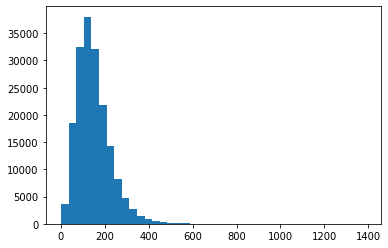

In [149]:
plt.hist(char_lens, bins=40)

In [150]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [151]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [152]:
NUM_CHAR_TOKENS = len(alphabet) + 2 
char_vectorizer = tf.keras.layers.TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                                    output_sequence_length=output_seq_char_len,
                                                    standardize="lower_and_strip_punctuation",
                                                    name="char_vectorizer")

char_vectorizer.adapt(train_chars)

In [153]:
char_embed = tf.keras.layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                                       output_dim=25,
                                       mask_zero=False,
                                       name='char_embed')

In [154]:
inputs = tf.keras.layers.Input(shape=(1,), name='input_layer', dtype='string')
char_vct = char_vectorizer(inputs)
char_embedding = char_embed(char_vct)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embedding)
x = layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(units=num_classes, activation='sigmoid')(x)
model3 = tf.keras.Model(inputs,outputs)

model3.compile(loss='categorical_crossentropy',
               optimizer='Adam',
               metrics=['accuracy'])

In [155]:
model3.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_3 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 5)                 325 

In [156]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [157]:
model3_history = model3.fit(train_char_dataset,
                             steps_per_epoch=int(0.1 * len(train_char_dataset)),
                             epochs=3,
                             validation_data=val_char_dataset,
                             validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 7ms/step - loss: 1.2499 - accuracy: 0.4976 - val_loss: 1.0253 - val_accuracy: 0.5891
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9882 - accuracy: 0.6034 - val_loss: 0.9316 - val_accuracy: 0.6403
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9142 - accuracy: 0.6401 - val_loss: 0.8630 - val_accuracy: 0.6642


In [158]:
model3.evaluate(val_char_dataset)

945/945 [==============================] - 3s 4ms/step - loss: 0.8772 - accuracy: 0.6573


[0.8772382140159607, 0.6572554111480713]

In [159]:
model3_pred_probs = model3.predict(val_char_dataset)
model3_pred_probs

array([[0.51284915, 0.75454724, 0.14134455, 0.68434626, 0.23475727],
       [0.6159034 , 0.752607  , 0.11019653, 0.6727616 , 0.21962844],
       [0.48540017, 0.39236307, 0.4435312 , 0.68728364, 0.15192783],
       ...,
       [0.16843519, 0.24979673, 0.42050904, 0.24888803, 0.87577444],
       [0.22158915, 0.28283915, 0.7865164 , 0.2481563 , 0.7592845 ],
       [0.7370522 , 0.73354834, 0.21120581, 0.42864078, 0.10586008]],
      dtype=float32)

In [160]:
model3_preds = tf.argmax(model3_pred_probs, axis=1)

In [161]:
model3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 2, 0])>

In [162]:
model3_results = calculate_results(val_labels_encoded,
                                   model3_preds)
model3_results

{'accuracy': 65.72553952072025,
 'precision': 0.6514884304825829,
 'recall': 0.6572553952072024,
 'f1': 0.6455131974309756}

## Model4

In [163]:
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)


char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) 
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)


token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])


combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)


model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [164]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

In [165]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [166]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) 
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_onehot) 
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) 

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_onehot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [167]:
model_4_history = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 23s 36ms/step - loss: 0.9693 - accuracy: 0.6167 - val_loss: 0.7740 - val_accuracy: 0.6981
Epoch 2/3
562/562 [==============================] - 19s 34ms/step - loss: 0.7963 - accuracy: 0.6938 - val_loss: 0.7197 - val_accuracy: 0.7244
Epoch 3/3
562/562 [==============================] - 19s 34ms/step - loss: 0.7719 - accuracy: 0.7058 - val_loss: 0.6894 - val_accuracy: 0.7394


In [168]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 21s 22ms/step - loss: 0.6944 - accuracy: 0.7341


[0.6943563222885132, 0.7341122627258301]

In [169]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)

In [170]:
model_4_results = calculate_results(val_labels_encoded,
                                    model_4_preds)

In [171]:
model_4_results

{'accuracy': 73.41122732688999,
 'precision': 0.7336792690849477,
 'recall': 0.7341122732688998,
 'f1': 0.7315347407648715}

## Model6

In [173]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [176]:
train_line_numbers_onehot = tf.one_hot(train_df['line_number'].to_numpy(), depth=15)
train_line_numbers_onehot

<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [179]:
val_line_number_onehot = tf.one_hot(val_df['line_number'].to_numpy(), depth=15)

In [183]:
test_line_number_onehot = tf.one_hot(val_df['line_number'].to_numpy(), depth=15)

In [184]:
train_total_lines_onehot = tf.one_hot(train_df['total_lines'].to_numpy(), depth=20)
val_total_lines_onehot = tf.one_hot(val_df['total_lines'].to_numpy(), depth=20)
test_total_lines_onehot = tf.one_hot(test_df['total_lines'].to_numpy(), depth=20)

In [195]:
token_inputs = layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

line_number_inputs = layers.Input(shape=(15,),dtype=tf.float32, name='line_number_input')
x = layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs,x)

total_lines_inputs = layers.Input(shape=(20,), dtype=tf.float32, name='total_lines_input')
y = layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, y)

combined_embeddings = layers.Concatenate(name='char_token_hybrid')([token_model.output,char_model.output])
z = layers.Dense(256, activation='relu')(combined_embeddings)
z = layers.Dropout(0.5)(z)

z = layers.Concatenate(name="token_char_positional")([line_number_model.output,
                                                      total_lines_model.output,
                                                      z])

output_layer = layers.Dense(5, activation='softmax', name='output_layer')(z)

model5 = tf.keras.Model(inputs=[line_number_model.input, total_lines_model.input, token_model.input, char_model.input],
                        outputs=output_layer)

In [196]:
model5.summary()

Model: "model_47"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']    

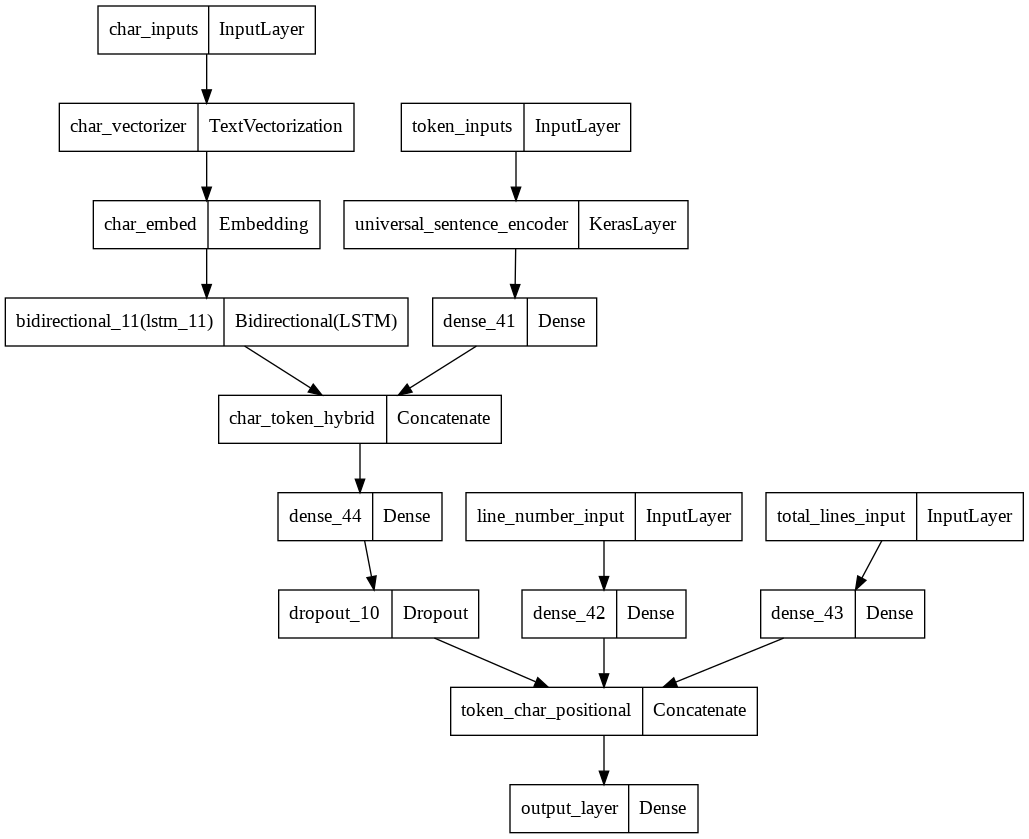

In [197]:
from tensorflow.keras.utils import plot_model
plot_model(model5)


In [198]:
model5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
               optimizer='Adam',
               metrics=['accuracy'])

In [199]:
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_onehot, 
                                                                train_total_lines_onehot, 
                                                                train_sentences, 
                                                                train_chars)) 
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_onehot) 
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels))
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_number_onehot,
                                                              val_total_lines_onehot,
                                                              val_sentences,
                                                              val_chars))

val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_onehot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [200]:
hist5 = model5.fit(train_pos_char_token_dataset,
                   epochs=3,
                   steps_per_epoch = int(0.1*(len(train_pos_char_token_dataset))),
                   validation_data=val_pos_char_token_dataset,
                   validation_steps=int(0.1*(len(val_pos_char_token_dataset))))

Epoch 1/3
562/562 [==============================] - 27s 38ms/step - loss: 1.0949 - accuracy: 0.7236 - val_loss: 0.9897 - val_accuracy: 0.8042
Epoch 2/3
562/562 [==============================] - 28s 50ms/step - loss: 0.9679 - accuracy: 0.8145 - val_loss: 0.9511 - val_accuracy: 0.8265
Epoch 3/3
562/562 [==============================] - 28s 49ms/step - loss: 0.9512 - accuracy: 0.8241 - val_loss: 0.9386 - val_accuracy: 0.8348


In [201]:
model5_pred_probs = model5.predict(val_pos_char_token_dataset)
model5_pred_probs

array([[0.4701649 , 0.12604733, 0.00972542, 0.3744294 , 0.01963297],
       [0.5007146 , 0.10996991, 0.03838286, 0.34024173, 0.01069094],
       [0.26241773, 0.11462375, 0.10494462, 0.4651695 , 0.05284442],
       ...,
       [0.03363645, 0.10177095, 0.03947745, 0.0314326 , 0.7936826 ],
       [0.02640856, 0.2683482 , 0.07850699, 0.02880575, 0.5979305 ],
       [0.19038552, 0.62762517, 0.08998435, 0.04089165, 0.05111328]],
      dtype=float32)

In [202]:
model5_preds = tf.argmax(model5_pred_probs, axis=1)
model5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [203]:
model5_results = calculate_results(val_labels_encoded, model5_preds)

In [204]:
model5_results

{'accuracy': 83.35429630610354,
 'precision': 0.8323552185860451,
 'recall': 0.8335429630610354,
 'f1': 0.8326797092406569}